In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from planar_manipulator import PlanarManipulator

In [ ]:
L1 = 1.0
L2 = 1.0

q1 = 0
q2 = np.pi
q1_lim = np.array([-np.pi/2, np.pi/2])
q2_lim = np.array([-np.pi/3, np.pi/3])

robot = PlanarManipulator(L1, L2, q1_lim, q2_lim)

q1_lin = np.linspace(q1_lim[0], q1_lim[1], 50)
q2_lin = np.linspace(q2_lim[0], q2_lim[1], 50)

Q1, Q2 = np.meshgrid(q1_lin, q2_lin)
q1_flat = Q1.ravel()
q2_flat = Q2.ravel()

q = np.vstack((q1_flat, q2_flat)).T
elbow, wrist = robot.forward_kinematics(q)

data = pd.DataFrame({
    'q1' : q1_flat,
    'q2' : q2_flat,
    'x2' : wrist[:, 0],
    'y2' : wrist[:, 1]
})


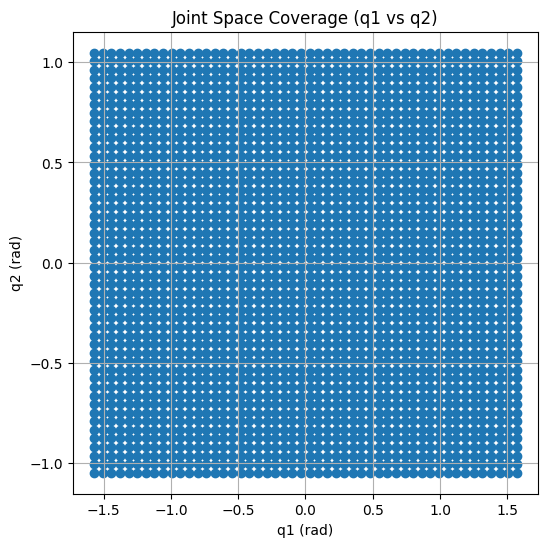

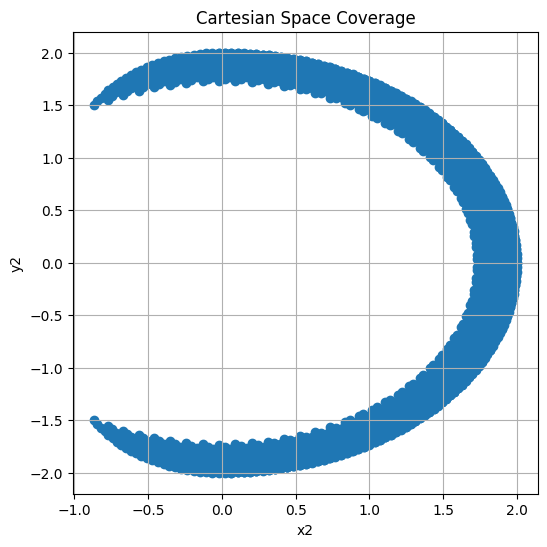

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(data['q1'], data['q2'])
plt.xlabel('q1 (rad)')
plt.ylabel('q2 (rad)')
plt.title('Joint Space Coverage (q1 vs q2)')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(data['x2'], data['y2'])
plt.xlabel('x2')
plt.ylabel('y2')
plt.title('Cartesian Space Coverage')
plt.grid(True)
plt.show()


In [22]:
data.to_csv('my_data.csv', index=False)